In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Relação Horas Estudadas - Nota')

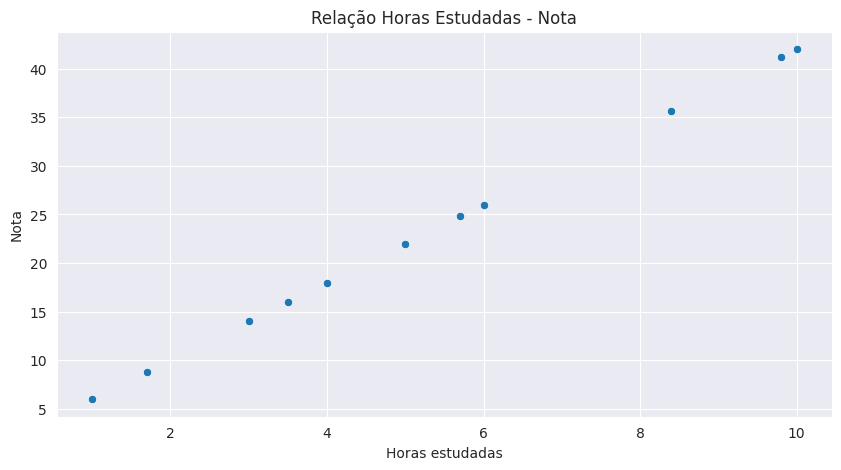

In [ ]:
# Estilo dos graficos
sns.set_style('darkgrid')

horas_estudos = np.array([1,4,5,3,6,4,8.4,3.5,1.7,9.8,10,5.7])

notas = 2 + 4 * horas_estudos

plt.figure(figsize=(10,5))
sns.scatterplot(x = horas_estudos,y = notas)
plt.xlabel('Horas estudadas')
plt.ylabel('Nota')
plt.title('Relação Horas Estudadas - Nota')

In [ ]:
# Criando dados X
X = np.random.rand(100,1) * 3

In [ ]:
from sklearn.preprocessing import add_dummy_feature
X_Dummy = add_dummy_feature(X)

In [ ]:
# Criando dados y
y = 5 * X - 8 + np.random.rand(100,1)

Text(0.5, 1.0, 'Relação entre X e y')

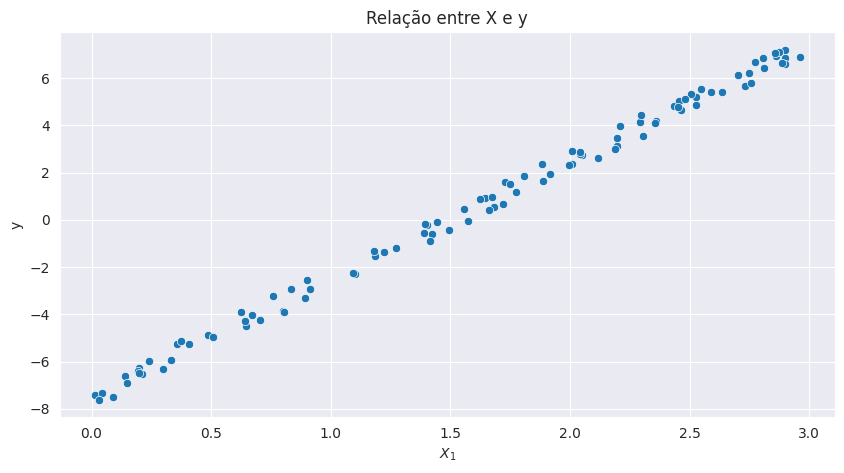

In [ ]:
# Plotando os dados
plt.figure(figsize=(10,5))
sns.scatterplot(x = X.reshape(1,-1)[0],y = y.reshape(1,-1)[0])
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Relação entre X e y')

In [ ]:
teta = np.linalg.inv(X_Dummy.T.dot(X_Dummy)).dot(X_Dummy.T).dot(y)

In [ ]:
X_new = np.linspace(start=0,stop=3,num = 100)

Text(0.5, 1.0, 'Relação entre X e y')

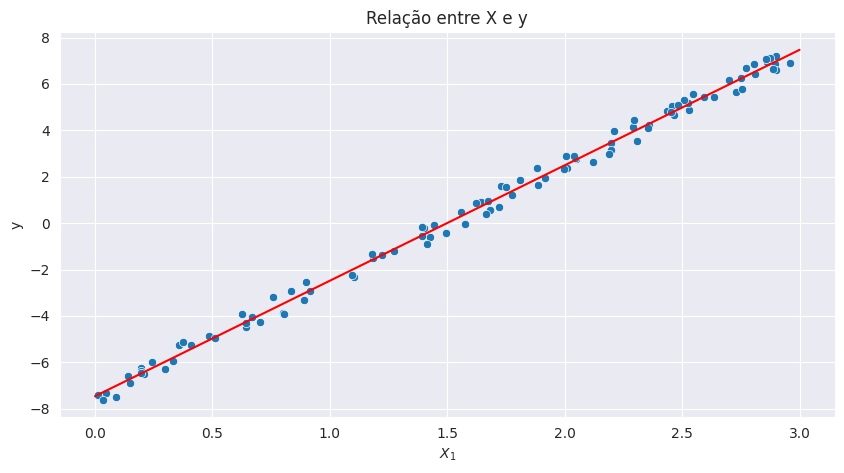

In [ ]:
# Plotando os dados com a reta
plt.figure(figsize=(10,5))
sns.scatterplot(x = X.reshape(1,-1)[0],y = y.reshape(1,-1)[0])
sns.lineplot(x = X_new,y = teta[1][0] * X_new + teta[0][0], color ='red')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Relação entre X e y')

In [ ]:
# Definindo uma função pra calcular o MSE
def MSE(y_real,y_previsto):
  return np.sum(((y_real - y_previsto)** 2) / len(y_real))

In [ ]:
y_previsto = teta.T.dot(X_Dummy.T).T


In [ ]:
MSE(y,y_previsto)

0.08299610339416892

## Agora usando a ScikitLearn


In [ ]:
from sklearn.linear_model import LinearRegression
# instanciar o modelo
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
# Visualizando os parâmetros
print(f'Coeficiente angular: {modelo.coef_}, coeficiente linear : {modelo.intercept_}')

Coeficiente angular: [[4.9764478]], coeficiente linear : [-7.45990802]


In [ ]:
y_previsto = modelo.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(y,y_previsto)

0.08299610339416891

In [ ]:
# Calculando com a PseudoInversa
teta_pseudo = np.linalg.pinv(X_Dummy).dot(y)

In [ ]:
teta_pseudo

array([[-7.45990802],
       [ 4.9764478 ]])

# Regressão Polinomial

In [ ]:
y = 2 * X **3 - 0.5 * X ** 2 + X - 9 + np.random.randn(100,1)

Text(0.5, 1.0, 'Relação entre X e y')

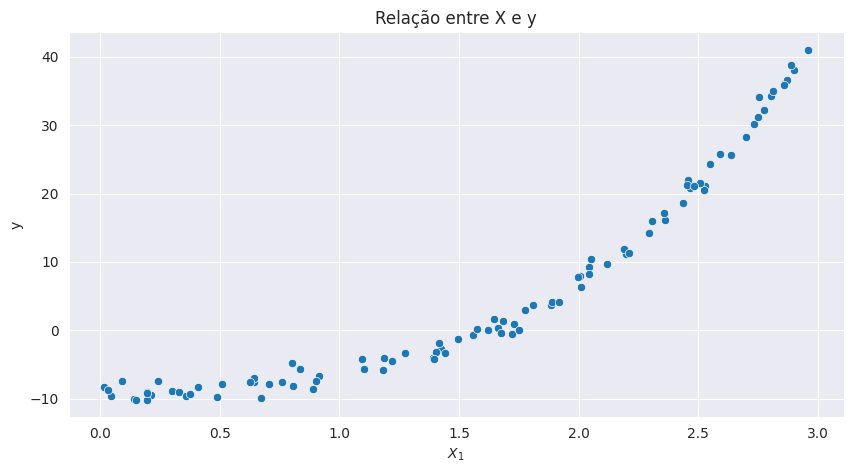

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = X.reshape(1,-1)[0],y = y.reshape(1,-1)[0])
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Relação entre X e y')

In [ ]:
# tentando calcular como se fosse uma reta
teta = np.linalg.inv(X_Dummy.T.dot(X_Dummy)).dot(X_Dummy.T).dot(y)

Text(0.5, 1.0, 'Relação entre X e y')

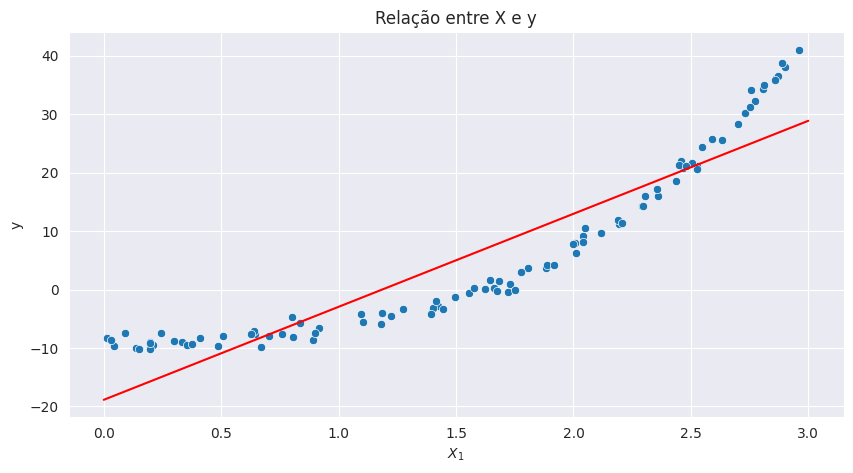

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = X.reshape(1,-1)[0],y = y.reshape(1,-1)[0])
sns.lineplot(x=X_new,y=teta[1][0]*X_new + teta[0][0], color='red')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Relação entre X e y')

In [ ]:
# Calculando y_previsto
y_previsto = teta.T.dot(X_Dummy.T).T


In [ ]:
MSE(y,y_previsto)

36.80200165584586

In [ ]:
# Comçeando a lidar como Polinomial
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias= True)

X_poly = poly.fit_transform(X)

In [ ]:
teta = np.linalg.pinv(X_poly).dot(y)

In [ ]:
y_previsto = teta.T.dot(X_poly.T).T

In [ ]:
MSE(y,y_previsto)

0.945671743432145

Text(0.5, 1.0, 'Relação entre X e y')

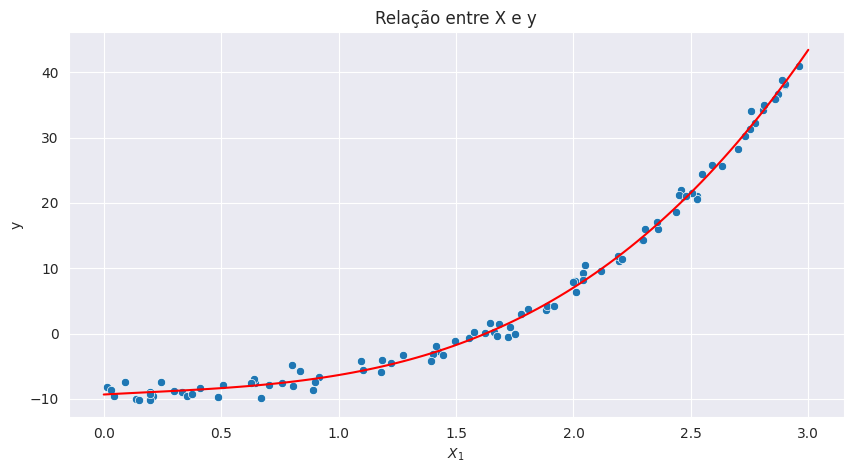

In [ ]:
# Plotando os dados com a reta
x_new_poly = poly.fit_transform(X_new.reshape(-1,1))

plt.figure(figsize=(10,5))
sns.scatterplot(x = X.reshape(1,-1)[0],y = y.reshape(1,-1)[0])
sns.lineplot(x = X_new,y = teta.T.dot(x_new_poly.T)[0], color ='red')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Relação entre X e y')